In [1]:
import pandas as pd
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
summary_stats = train_data.describe()
summary_stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
missing_values = train_data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


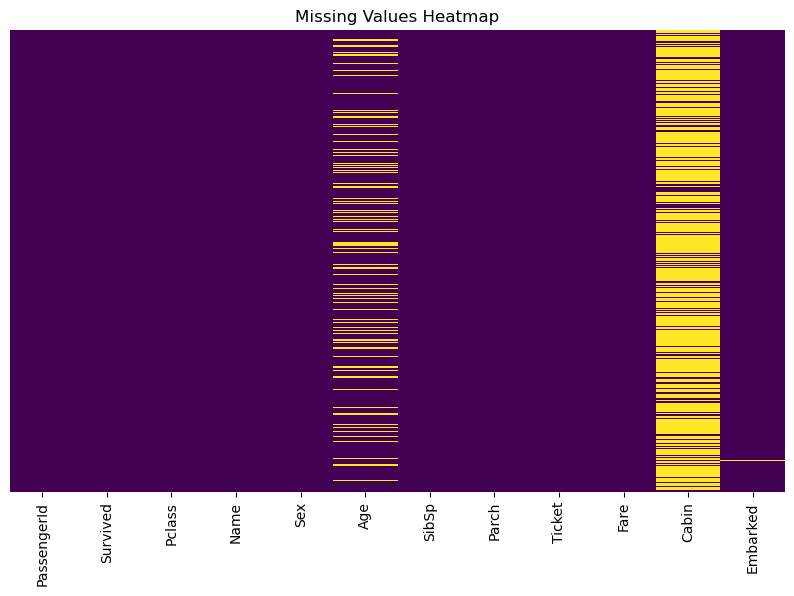

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)
missing_values_after_handling = train_data.isnull().sum()
print("Missing Values after Handling:\n", missing_values_after_handling)

Missing Values after Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [12]:
survival_percentage = (train_data['Survived'].sum() / len(train_data)) * 100
print(f"Percentage of people who survived: {survival_percentage:.2f}%")


Percentage of people who survived: 38.38%


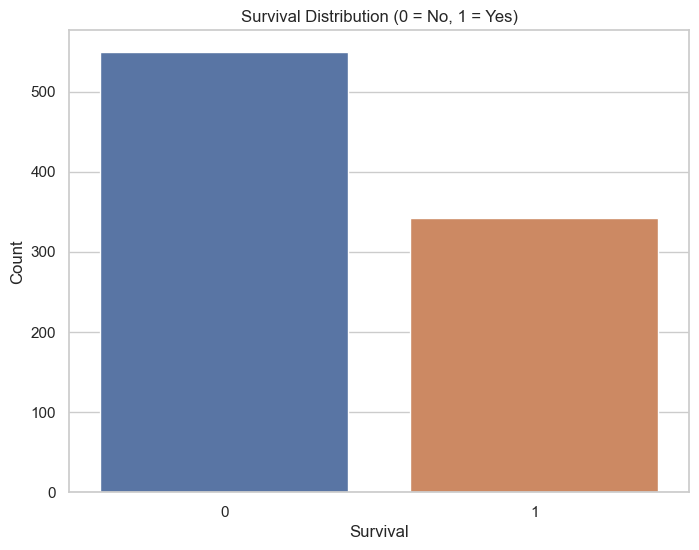

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()


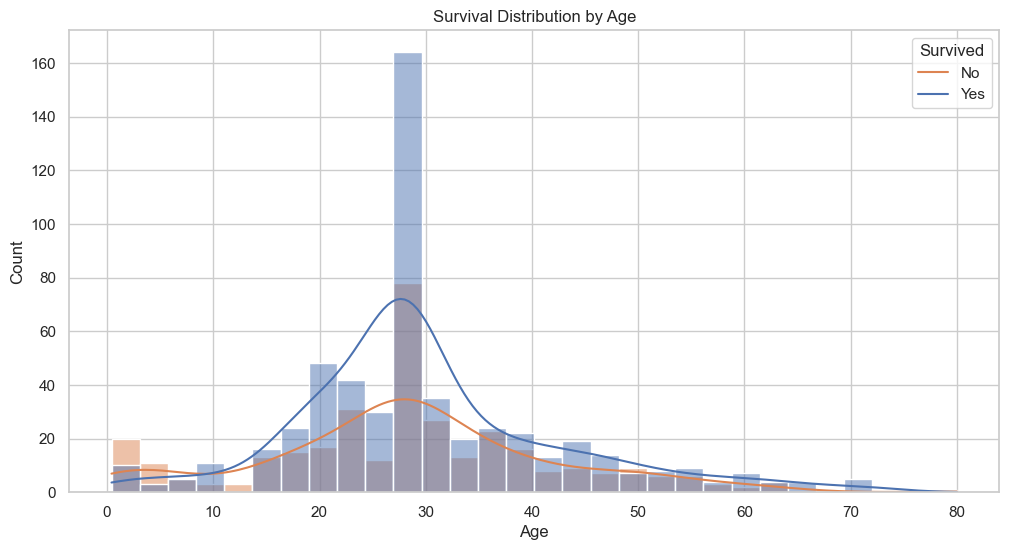

In [14]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True) 
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


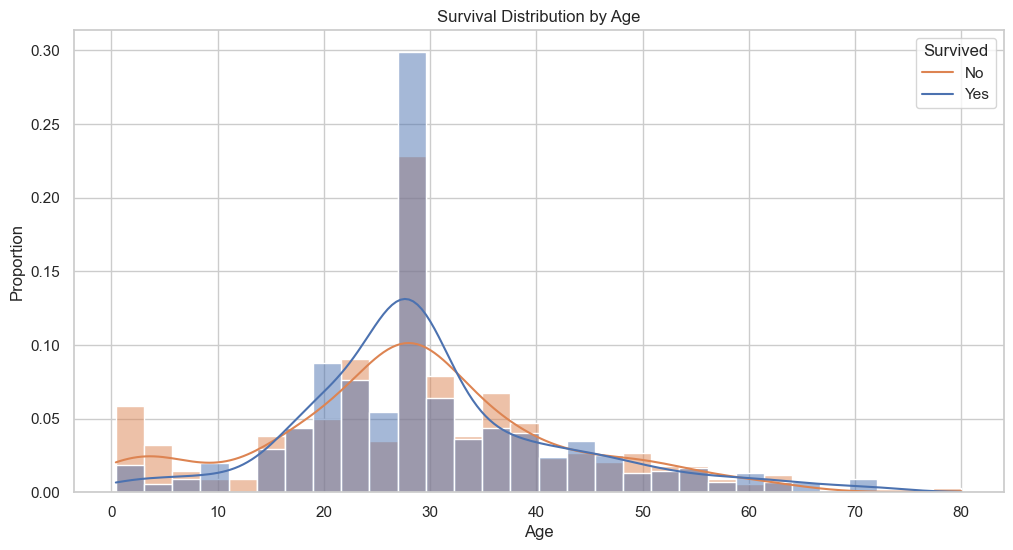

In [15]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True, stat='probability', common_norm=False)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

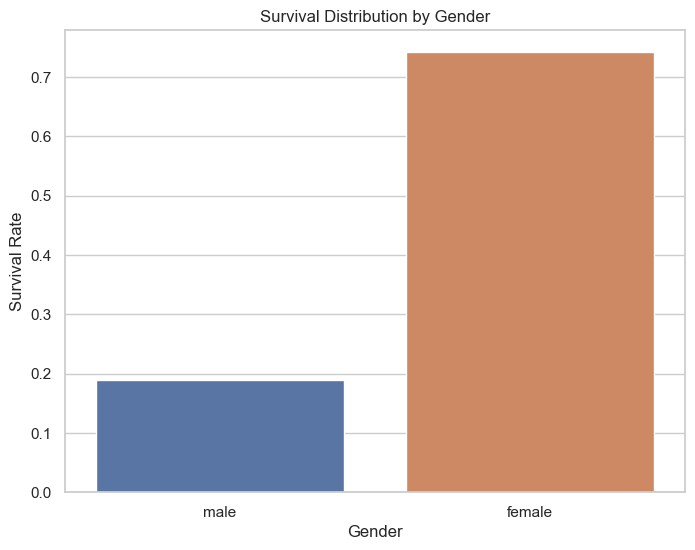

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data, errorbar=None)
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


In [17]:
train_data_copy = train_data.copy()

In [20]:
train_data_copy['Survived'] = train_data_copy['Survived'].astype(str)

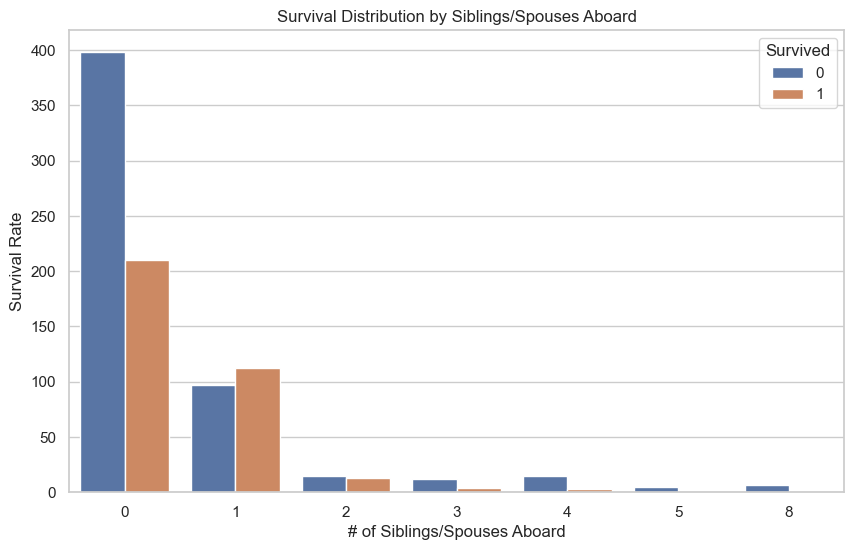

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=train_data_copy)
plt.title('Survival Distribution by Siblings/Spouses Aboard')
plt.xlabel('# of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()


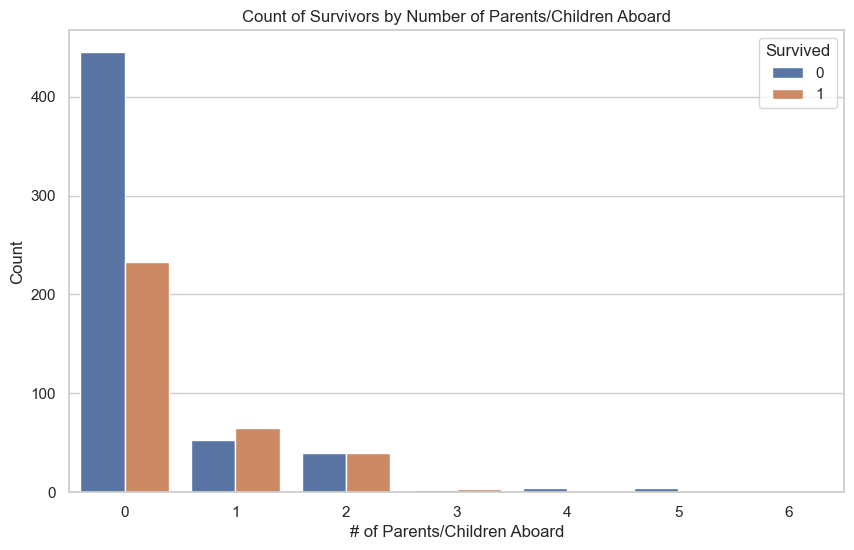

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', hue='Survived', data=train_data_copy)
plt.title('Count of Survivors by Number of Parents/Children Aboard')
plt.xlabel('# of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()

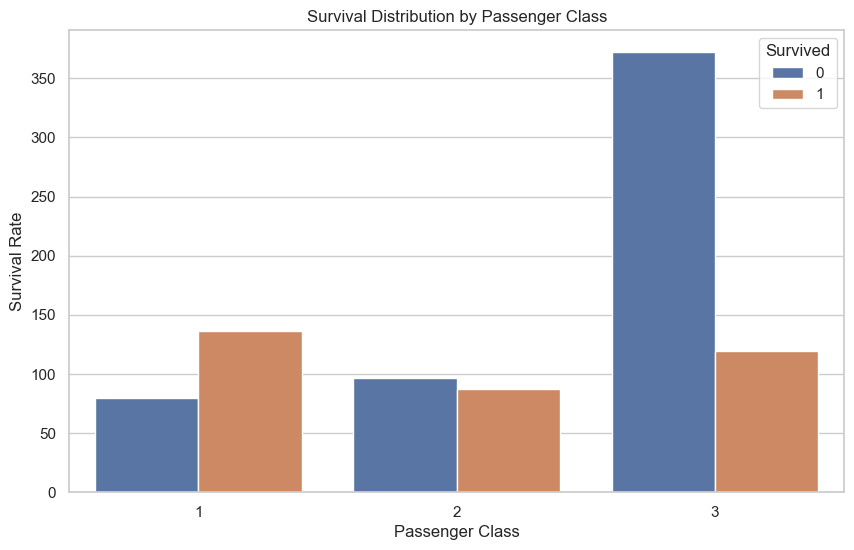

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data_copy)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


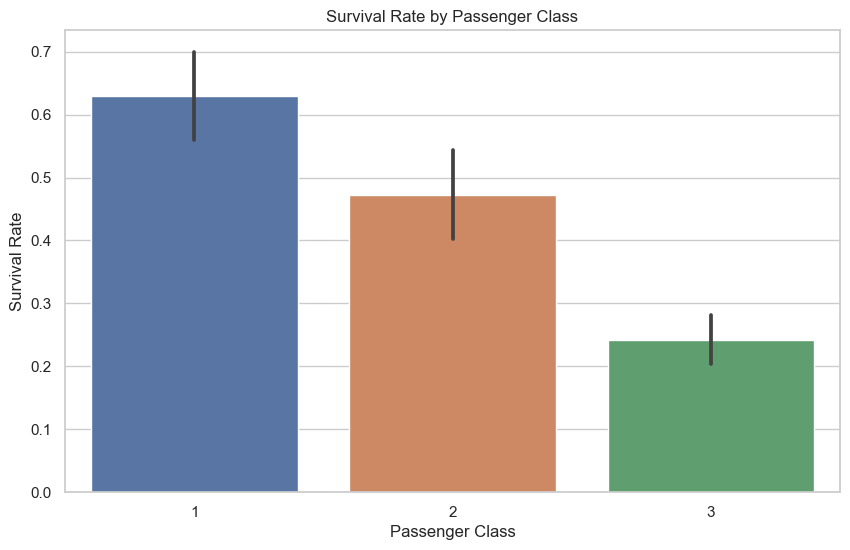

In [29]:
train_data['Survived'] = train_data['Survived'].astype(int)
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [31]:
average_fare = train_data.groupby('Survived')['Fare'].mean()
print("Average Fare for Non-Survivors:", average_fare[0])
print("Average Fare for Survivors:", average_fare[1])


Average Fare for Non-Survivors: 22.117886885245902
Average Fare for Survivors: 48.39540760233918


In [32]:
embarked_survival = pd.crosstab(train_data['Embarked'], train_data['Survived'], margins=True, margins_name='Total')
embarked_survival

Survived,0,1,Total
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646
Total,549,342,891


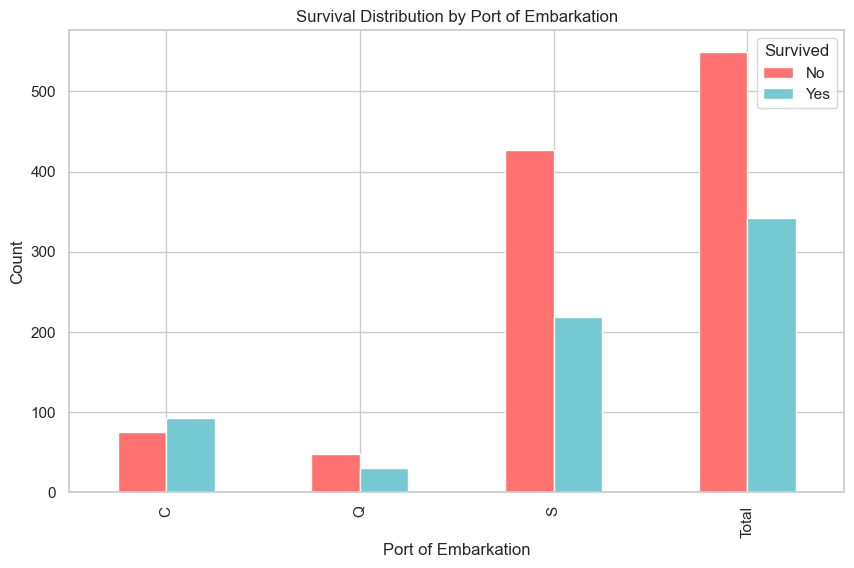

In [34]:
embarked_survival.drop('Total', axis=1, inplace=True)  
embarked_survival.plot(kind='bar', color=['#FF726F', '#74C9D2'], figsize=(10, 6))
plt.title('Survival Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [38]:
embarked_survival_rate = pd.crosstab(index=train_data['Embarked'], columns=train_data['Survived'], normalize='index') * 100
embarked_survival_rate


Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.099071,33.900929


In [39]:
test_data = pd.read_csv('test.csv')


In [41]:
train_data = train_data.drop(['Name'], axis=1)

In [43]:
train_data = train_data.drop(['PassengerId', 'Ticket'], axis=1)

In [45]:
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [46]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = MinMaxScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

In [50]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [52]:
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf']
    }
}


In [53]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()


In [55]:
grid_rf = GridSearchCV(rf, param_grid['RandomForest'], cv=5)
grid_rf.fit(X_train, y_train)

grid_gb = GridSearchCV(gb, param_grid['GradientBoosting'], cv=5)
grid_gb.fit(X_train, y_train)

grid_svm = GridSearchCV(svm, param_grid['SVM'], cv=5)
grid_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [61]:
print("Random Forest - Best parameters:", grid_rf.best_params_)
print("Random Forest - Best accuracy:", grid_rf.best_score_)

print("Gradient Boosting - Best parameters:", grid_gb.best_params_)
print("Gradient Boosting - Best accuracy:", grid_gb.best_score_)

print("SVM - Best parameters:", grid_svm.best_params_)
print("SVM - Best accuracy:", grid_svm.best_score_)


Random Forest - Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest - Best accuracy: 0.8314389835516597
Gradient Boosting - Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Gradient Boosting - Best accuracy: 0.8272530286614794
SVM - Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVM - Best accuracy: 0.8174135723431497


In [63]:
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42  # You can set a random seed for reproducibility
)

In [64]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [66]:
y_pred = best_rf_model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8491620111731844


In [71]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
# 2. Cabin: Drop the column
test_data.drop('Cabin', axis=1, inplace=True)

# 3. Embarked: Fill missing values with the most common value
most_common_embarked_test = test_data['Embarked'].mode()[0]
test_data['Embarked'].fillna(most_common_embarked_test, inplace=True)
test_data = test_data.drop(['Name','PassengerId', 'Ticket'], axis=1)
test_data = pd.get_dummies(test_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
test_data[numerical_cols] = scaler.fit_transform(test_data[numerical_cols])

In [72]:
new_prediciton = best_rf_model.predict(test_data)

In [73]:
test_data['Survived_prediciton'] = new_prediciton
test_data

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_prediciton
0,0.452723,0.000,0.000000,0.015282,False,True,True,True,False,0
1,0.617566,0.125,0.000000,0.013663,False,True,False,False,True,0
2,0.815377,0.000,0.000000,0.018909,True,False,True,True,False,0
3,0.353818,0.000,0.000000,0.016908,False,True,True,False,True,0
4,0.287881,0.125,0.111111,0.023984,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...
413,0.353818,0.000,0.000000,0.015713,False,True,True,False,True,0
414,0.512066,0.000,0.000000,0.212559,False,False,False,False,False,1
415,0.505473,0.000,0.000000,0.014151,False,True,True,False,True,0
416,0.353818,0.000,0.000000,0.015713,False,True,True,False,True,0


In [75]:
test_data[test_data['Survived_prediciton'] == 1]

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_prediciton
6,0.393380,0.000,0.000000,0.014891,False,True,False,True,False,1
8,0.235131,0.000,0.000000,0.014110,False,True,False,False,False,1
12,0.301068,0.125,0.000000,0.160574,False,False,False,False,True,1
14,0.617566,0.125,0.000000,0.119406,False,False,False,False,True,1
15,0.314256,0.125,0.000000,0.054107,True,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...
408,0.353818,0.000,0.000000,0.015070,False,True,False,True,False,1
409,0.037320,0.125,0.111111,0.026887,False,True,False,False,True,1
410,0.353818,0.000,0.000000,0.015127,False,True,False,True,False,1
411,0.485692,0.125,0.000000,0.175668,False,False,False,True,False,1
